<a href="https://colab.research.google.com/github/jumanadyab/MSRP-Prediction/blob/main/MSRP%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Machine learning project**

Predicting MRSP (manufacturer's suggested retail price)
* Read the cars CSV file and explore its columns
* Select features and target
* Split data to train and validation
* Preprocess data:
1. Clean missing values in numeric features
2. Clean missing values iin categoracal features
3. Encode categorical features
* Choose model for regression problem
* Model validation: create a function to test performance of the model
* Find best leaf nodes
* Single or cross validation?
* Build final model train it on all data

# Read & Explore the data

In [ ]:
import pandas as pd   
# Load data
from google.colab import drive
# drive.mount('/content/gdrive')

In [ ]:
# data = pd.read_csv('/content/gdrive/MyDrive/steam curriculum /machine learning/cars.csv')

In [ ]:
data = pd.read_csv("cars.csv")

In [ ]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [ ]:
data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [ ]:
data.shape # the shape for the data

(11914, 16)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


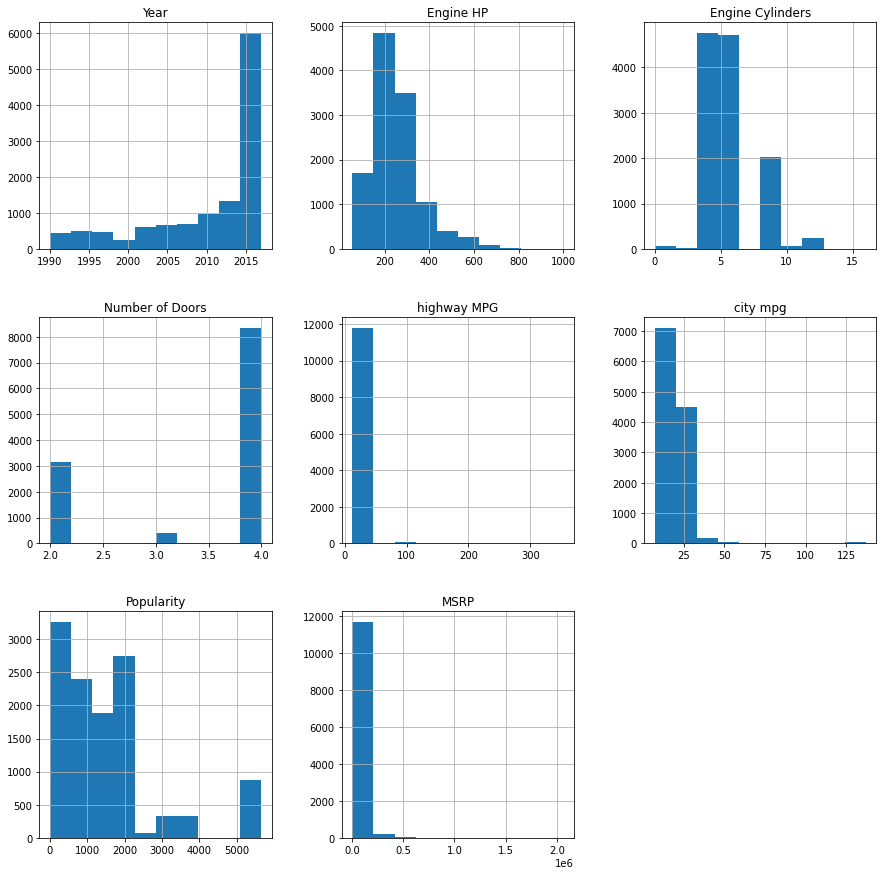

In [ ]:
import matplotlib.pyplot as plt # import the plotting library
fig, ax = plt.subplots(figsize=(15,15)) 
data.hist(ax=ax); # make the histogram plot

In [ ]:
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

# Select Features & Target

In [ ]:
X = data.drop(columns= 'MSRP')
y = data['MSRP']

print("X shape: ",X.shape)
print("y shape: ",y.shape)

X shape:  (11914, 15)
y shape:  (11914,)


# Split data to Train & Validation

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state = 0)

print("X train shape: ", X_train.shape)
print("X val shape: ", X_val.shape)
print("y train shape: ", y_train.shape)
print("y val shape: ", y_val.shape)

X train shape:  (9531, 15)
X val shape:  (2383, 15)
y train shape:  (9531,)
y val shape:  (2383,)


# Preprocessing

In [ ]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

# numeric columns 
numeric_cols = data.select_dtypes('number').columns.to_list() # list of numerical columns
numeric_imputer = SimpleImputer(strategy='mean') # make object by filling the mean
data[numeric_cols] = numeric_imputer.fit_transform(data[numeric_cols]) # fit & transform the results to the original columns

# categorical columns
categorical_cols = data.select_dtypes('object').columns.to_list() # list of categorical columns
categorical_imputer = SimpleImputer(strategy='most_frequent') # make object by filling the most frequent
data[categorical_cols] = categorical_imputer.fit_transform(data[categorical_cols]) # fit & transform the results to the original columns

In [ ]:
data.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [ ]:
data[categorical_cols].describe()

,Make,Model,Engine Fuel Type,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style
count,11914,11914,11914,11914,11914,11914,11914,11914
unique,48,915,10,5,4,71,3,16
top,Chevrolet,Silverado 1500,regular unleaded,AUTOMATIC,front wheel drive,Crossover,Compact,Sedan
freq,1123,156,7175,8266,4787,4852,4764,3048


In [ ]:
print(data.shape) # the shape before

data.drop(columns=['Model','Market Category'], inplace=True) # Drop the columns that have more than 50 unique values

print(data.shape) # the shape after


(11914, 16)
(11914, 14)


2 Columns have been dropped <br> Now we will do the `One Hot Encoder` for encoding the categorical features.

In [ ]:
# the shape before
print(data.shape)

# Apply OneHotEncoder using pandas.get_dummies
data = pd.get_dummies(data)

# the shape after
print(data.shape)

(11914, 14)
(11914, 94)


80 new columns as a result from `OneHotEncoding`

# Choosing model

In [ ]:
# Features & Target
X = data.drop(columns='MSRP')
y = data['MSRP']

# Train & Test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

# Import
from sklearn.svm import SVR

# build the model
model = SVR()

# Train the model
model.fit(X_train, y_train)

# Predict from the model
y_pred = model.predict(X_test)

(9531, 93) (2383, 93)
(9531,) (2383,)


# Model Validation + Create Function

In [ ]:
# Import
from sklearn.metrics import mean_squared_error
import numpy as np

# Function for test the performance
def test_performance(y_true, y_pred):

  # Calculate Mean Squared Error
  mse = mean_squared_error(y_true, y_pred)
  # Calculate Root Mean Squared Error
  rmse = np.sqrt(mse)

  print("RMSE: ", rmse)

# Call the function
test_performance(y_test, y_pred)

RMSE:  48394.50292189256


## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

test_performance(y_test, y_pred)

RMSE:  17862.152925397124


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

test_performance(y_test, y_pred)

RMSE:  10862.685641164791


# Find best leaf nodes

In [ ]:
leaf_nodes = range(150,250,2) # iterate throught these values and pick the best
error = [] # empty list to save the error values

for leaf in leaf_nodes:
  model = DecisionTreeRegressor(max_leaf_nodes=leaf, random_state=0)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  error.append(np.sqrt(mean_squared_error(y_test,y_pred)))

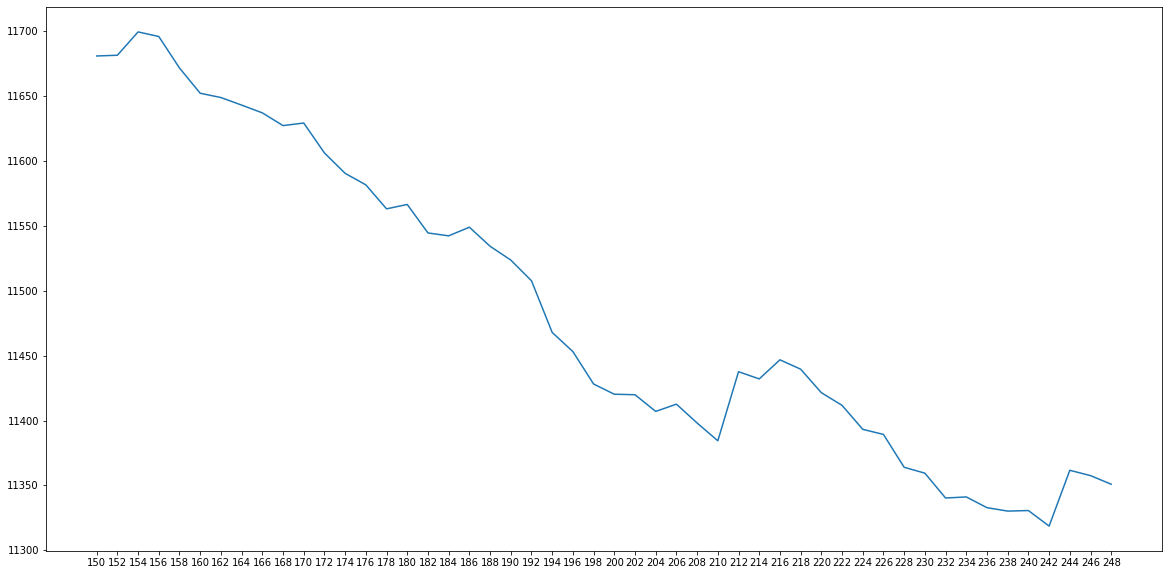

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(leaf_nodes, error);
plt.xticks(leaf_nodes);

242 is the best value for the `max_leaf_node` hyperparameter

## Find best max depth

In [ ]:
depth_list = range(2,100,2)
error = []

for depth in depth_list:
  model = DecisionTreeRegressor(max_depth=depth, max_leaf_nodes=242, random_state=0)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  error.append(np.sqrt(mean_squared_error(y_test,y_pred)))

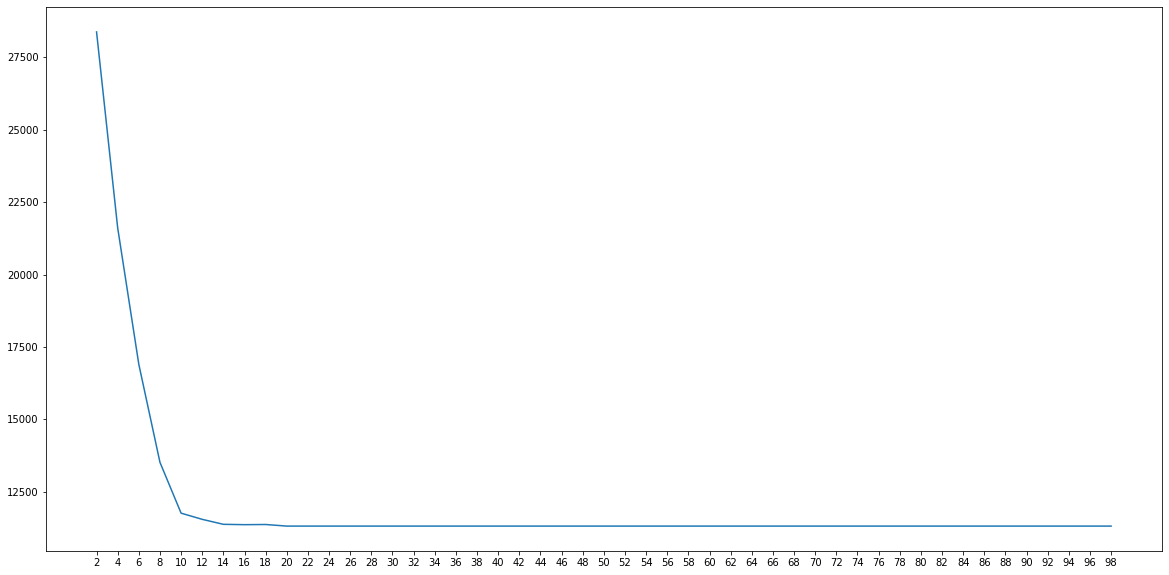

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(depth_list, error);
plt.xticks(depth_list);

# Single Or Cross

In [ ]:
# Single 
model = DecisionTreeRegressor(max_depth=24, max_leaf_nodes=242, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
test_performance(y_test, y_pred)

RMSE:  11318.756502813112


In [ ]:
# Cross Validation
# Import
from sklearn.model_selection import cross_val_score

# list of scores with the mean squared error
scores = -1 * cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# list of scores with the ROOT MSE
scores = np.sqrt(scores)
print("Scores: ", scores)

# The mean of all the scores
print("Mean of scores: ", scores.mean())

Scores:  [76484.37779019 30515.75589369 76393.47508475 33342.66236067
 48021.60207958]
Mean of scores:  52951.57464177431


I will choose single, because the error are less

# Build final model and train it on all data

In [ ]:
final_model = DecisionTreeRegressor(max_depth = 24, max_leaf_nodes=242, random_state=0)
final_model.fit(X, y)

DecisionTreeRegressor(max_depth=24, max_leaf_nodes=242, random_state=0)